## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [14]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [15]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


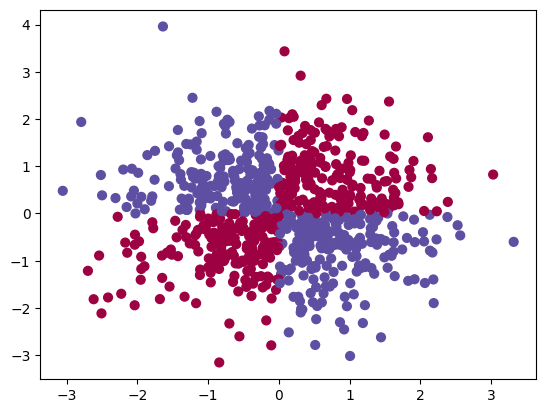

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

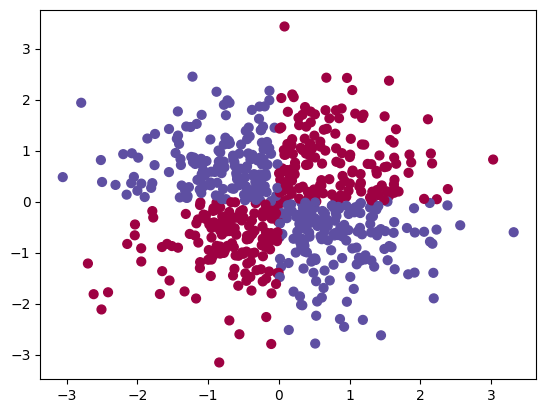

Epoch 0, Validation Loss: 1.5038701343194003
Epoch 500, Validation Loss: 1.4215450992432799
Epoch 1000, Validation Loss: 1.951068801813683
Epoch 1500, Validation Loss: 2.3747103546311816
Epoch 2000, Validation Loss: 2.754037367253776
Epoch 2500, Validation Loss: 3.098005407058561
Epoch 3000, Validation Loss: 3.406652257037485
Epoch 3500, Validation Loss: 3.6940249370892855
Epoch 4000, Validation Loss: 3.96457826203352
Epoch 4500, Validation Loss: 4.225844878281073
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       307
           1       0.96      0.98      0.97       333

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.97      0.99     

In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load XOR toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X = data['X_train']  # Full dataset
y = data['y_train']  # Full labels

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.show()

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Initialize network parameters
input_size = X_train.shape[1]
hidden_size = 10  # You can tune this
output_size = 1
learning_rate = 0.01
epochs = 5000
batch_size = 64

# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define the forward pass
def forward_pass(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Define the backward pass
def backward_pass(X, y, Z1, A1, Z2, A2):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Training the neural network
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation].reshape(-1, 1)

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        Z1, A1, Z2, A2 = forward_pass(X_batch)
        dW1, db1, dW2, db2 = backward_pass(X_batch, y_batch, Z1, A1, Z2, A2)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    if epoch % 500 == 0:
        _, _, _, A2_val = forward_pass(X_val)
        val_loss = -np.mean(y_val * np.log(A2_val) + (1 - y_val) * np.log(1 - A2_val))
        print(f'Epoch {epoch}, Validation Loss: {val_loss}')

# Evaluate the model
_, _, _, A2_train = forward_pass(X_train)
_, _, _, A2_test = forward_pass(X_test)

y_train_pred = (A2_train > 0.5).astype(int)
y_test_pred = (A2_test > 0.5).astype(int)

print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Summary of the model performance
summary = f"""
Model Performance Summary:
- Hidden Layer Size: {hidden_size}
- Learning Rate: {learning_rate}
- Batch Size: {batch_size}
- Number of Epochs: {epochs}

Classification Report on Training Set:
{classification_report(y_train, y_train_pred)}

Classification Report on Test Set:
{classification_report(y_test, y_test_pred)}
"""

print(summary)
